In [1]:
import pandas as pd

In [2]:
stk_data=pd.read_csv("Tatacoffee13_21.csv")

In [3]:
stk_data

,Date,Open,High,Low,Close
0,2013-01-01,1410.60,1427.90,1408.30,1415.10
1,2013-01-02,1421.00,1626.60,1416.15,1607.40
2,2013-01-03,1632.55,1673.90,1613.05,1626.20
3,2013-01-04,1627.75,1627.75,1574.60,1579.05
4,2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[[column]])
print("Len:", data1.shape)

Len: (2225, 1)


In [6]:
# Train/Test split
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)
train = data1[:training_size]
test = data1[training_size:]
print("Train length:", train.shape)
print("Test length:", test.shape)

Training size: 1780
Train length: (1780, 1)
Test length: (445, 1)


In [9]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA orders to test
orders = [(1,0,2), (1,0,1), (2,0,1), (1,0,1)]

for order in orders:
    print(f"\nTesting ARIMA order={order}")
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast only for the test set
    y_pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

    # Evaluate
    from stockFunctions import rmsemape
    rmsemape(test, y_pred)


Testing ARIMA order=(1, 0, 2)
RMSE-Testset: 0.05878784979938863
maPe-Testset: 158372900914.62173

Testing ARIMA order=(1, 0, 1)
RMSE-Testset: 0.058541785808884646
maPe-Testset: 157968562726.9221

Testing ARIMA order=(2, 0, 1)
RMSE-Testset: 0.05766461341819089
maPe-Testset: 157727282680.60803

Testing ARIMA order=(1, 0, 1)
RMSE-Testset: 0.058541785808884646
maPe-Testset: 157968562726.9221


In [10]:
#best arima model
from statsmodels.tsa.arima.model import ARIMA
from stockFunctions import rmsemape

# Fit the best ARIMA model directly
model = ARIMA(train, order=(2,0,1))
model_fit = model.fit()

# Forecast for the test set
y_pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate performance
rmsemape(test, y_pred)


RMSE-Testset: 0.05766461341819089
maPe-Testset: 157727282680.60803


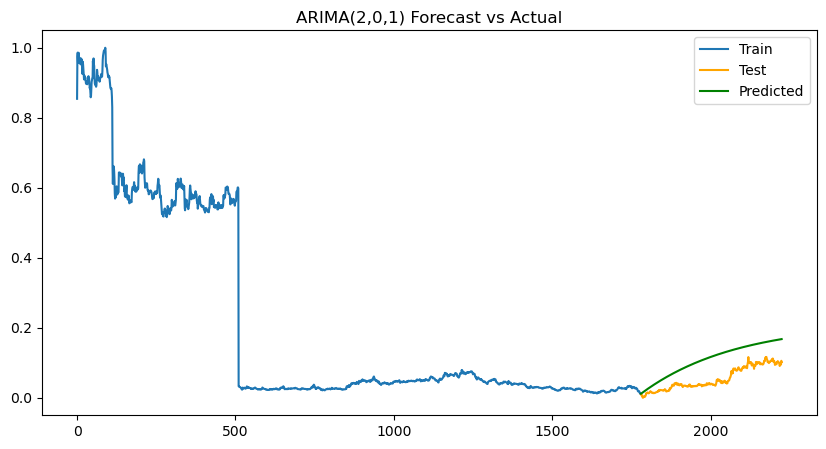

In [12]:
import matplotlib.pyplot as plt
# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(range(len(train)), train, label='Train')
plt.plot(range(len(train), len(train)+len(test)), test, label='Test', color='orange')
plt.plot(range(len(train), len(train)+len(test)), y_pred, label='Predicted', color='green')
plt.legend()
plt.title("ARIMA(2,0,1) Forecast vs Actual")
plt.show()

In [14]:
y_pred_original = Ms.inverse_transform(y_pred.reshape(-1,1))
test_original = Ms.inverse_transform(test.reshape(-1,1))

In [15]:
results = pd.DataFrame({
    "Actual": test_original.flatten(),
    "Predicted": y_pred_original.flatten()
})

In [16]:
results

,Actual,Predicted
0,64.30,67.924209
1,63.10,68.986432
2,60.70,70.063481
3,58.70,71.131144
4,59.80,72.197074
...,...,...
440,205.00,316.409805
441,202.95,316.657293
442,201.00,316.903955
443,218.35,317.149794


In [17]:
forecast = model_fit.predict(len(data1), len(data1)+3)

In [18]:
forecast

array([0.16777522, 0.16792745, 0.16807917, 0.16823039])

In [19]:
forecast_original = Ms.inverse_transform(forecast.reshape(-1,1))
print(forecast_original)


[[317.63901668]
 [317.88240479]
 [318.1249812 ]
 [318.36674861]]


In [23]:
forecast_result = pd.DataFrame({"Forecasted Price": forecast_original.ravel()})
print(forecast_result)

   Forecasted Price
0        317.639017
1        317.882405
2        318.124981
3        318.366749
